## EDA & ETL

In [22]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

%matplotlib inline

C:\Users\kari_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df=pd.read_excel('Power BI Dataset vF.xlsx')

In [6]:
df.shape

(3744, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Retailer           3744 non-null   object        
 1   Retailer ID        3744 non-null   int64         
 2   Invoice Date       3744 non-null   datetime64[ns]
 3   Region             3744 non-null   object        
 4   State              3744 non-null   object        
 5   City               3744 non-null   object        
 6   Beverage Brand     3744 non-null   object        
 7   Days to 
Deliver   3744 non-null   int64         
 8   Delivery 
Company  3744 non-null   object        
 9   Price per 
Unit    3744 non-null   float64       
 10  Units Sold         3744 non-null   int64         
 11  Total Sales        3744 non-null   float64       
 12  Operating Profit   3744 non-null   float64       
 13  Operating Margin   3744 non-null   float64       
dtypes: datet

In [8]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Beverage Brand', 'Days to \nDeliver', 'Delivery \nCompany',
       'Price per \nUnit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Operating Margin'],
      dtype='object')

In [9]:
df.isna().sum()

Retailer              0
Retailer ID           0
Invoice Date          0
Region                0
State                 0
City                  0
Beverage Brand        0
Days to \nDeliver     0
Delivery \nCompany    0
Price per \nUnit      0
Units Sold            0
Total Sales           0
Operating Profit      0
Operating Margin      0
dtype: int64

In [20]:
df.describe()

,Retailer ID,Invoice Date,Days to \nDeliver,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,3.744000e+03,3744,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000
mean,1.176706e+06,2022-06-27 23:13:50.769230848,37.174145,0.480288,4402.377137,2194.221421,812.270800,0.366493
min,1.128299e+06,2022-01-02 00:00:00,15.000000,0.100000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2022-03-31 00:00:00,26.000000,0.400000,2500.000000,1050.000000,367.500000,0.300000
50%,1.185732e+06,2022-06-29 00:00:00,37.000000,0.500000,4000.000000,1885.000000,665.000000,0.350000
75%,1.185732e+06,2022-09-28 00:00:00,49.000000,0.550000,5750.000000,3000.000000,1080.000000,0.400000
max,1.197831e+06,2022-12-25 00:00:00,60.000000,1.100000,12750.000000,8250.000000,3900.000000,0.650000
std,2.400406e+04,NaN,13.304029,0.145381,2275.420055,1456.333026,599.473408,0.075231


In [10]:
df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Days to \nDeliver,Delivery \nCompany,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Walmart,1185732,2022-01-14,Northeast,New York,New York,Coca-Cola,25,USPS,0.50,12000,6000.0,3000.000,0.50
1,Walmart,1185732,2022-01-14,Northeast,New York,New York,Diet Coke,34,FedEx,0.50,10000,5000.0,1500.000,0.30
2,Walmart,1185732,2022-01-14,Northeast,New York,New York,Sprite,48,UPS,0.40,10000,4000.0,1400.000,0.35
3,Walmart,1185732,2022-01-14,Northeast,New York,New York,Fanta,20,USPS,0.45,8500,3825.0,1338.750,0.35
4,Walmart,1185732,2022-01-14,Northeast,New York,New York,Powerade,26,USPS,0.60,9000,5400.0,1620.000,0.30
5,Walmart,1185732,2022-01-14,Northeast,New York,New York,Dasani Water,43,DHL,0.50,10000,5000.0,1250.000,0.25
6,Walmart,1185732,2022-02-12,Northeast,New York,New York,Coca-Cola,19,FedEx,0.50,12500,6250.0,3125.000,0.50
7,Walmart,1185732,2022-02-12,Northeast,New York,New York,Diet Coke,41,FedEx,0.50,9000,4500.0,1350.000,0.30
8,Walmart,1185732,2022-02-12,Northeast,New York,New York,Sprite,34,USPS,0.40,9500,3800.0,1330.000,0.35
9,Walmart,1185732,2022-02-12,Northeast,New York,New York,Fanta,42,UPS,0.45,8250,3712.5,1299.375,0.35


In [13]:
df['Retailer'].unique()

array(['Walmart', 'Costco', 'CVS', 'Target'], dtype=object)

In [15]:
# Agrupar y contar la cantidad de retailers
retail_counts = df.groupby('Retailer').size().reset_index(name='count')

In [16]:
print(retail_counts)

  Retailer  count
0      CVS    720
1   Costco    576
2   Target    144
3  Walmart   2304


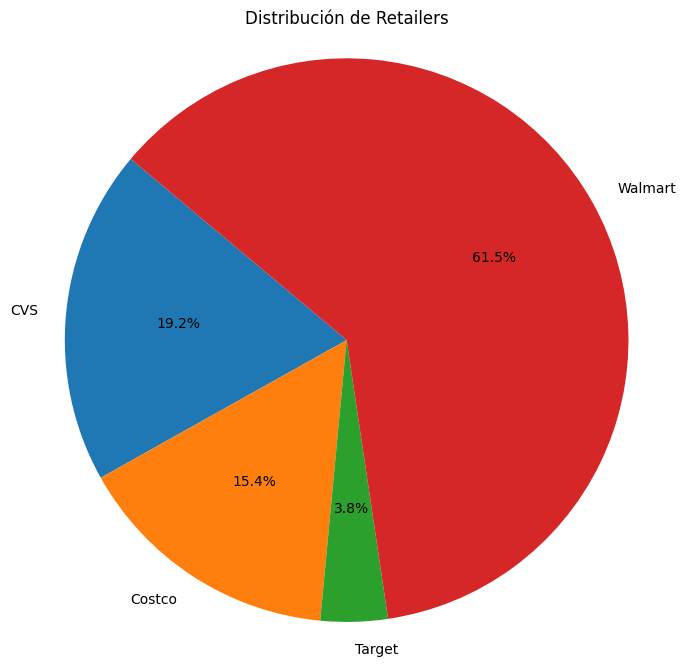

In [17]:
# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(retail_counts['count'], labels=retail_counts['Retailer'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de Retailers')
plt.show()

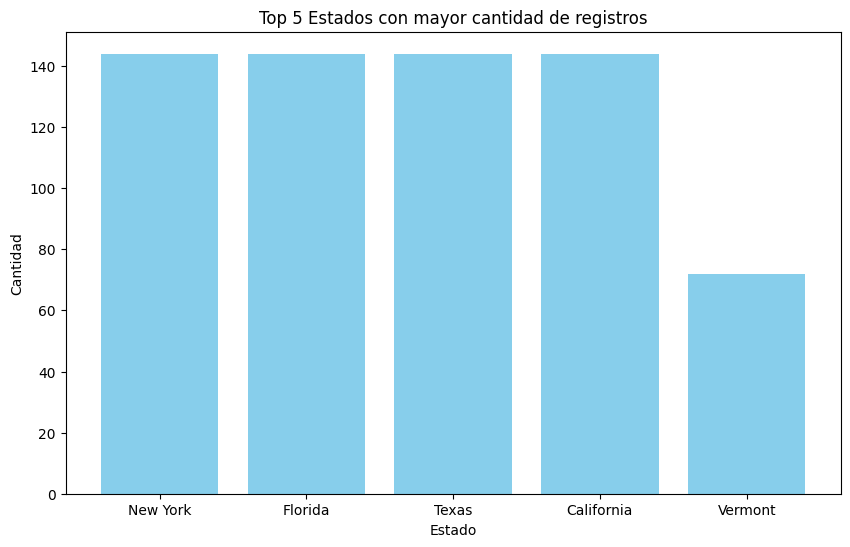

In [19]:
# Agrupar y contar la cantidad por estado
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
state_counts = state_counts.head(5)  # Obtener solo los top 5 estados

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(state_counts['State'], state_counts['Count'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.title('Top 5 Estados con mayor cantidad de registros')
plt.show()

In [11]:
df.describe()

,Retailer ID,Invoice Date,Days to \nDeliver,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,3.744000e+03,3744,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000
mean,1.176706e+06,2022-06-27 23:13:50.769230848,37.174145,0.480288,4402.377137,2194.221421,812.270800,0.366493
min,1.128299e+06,2022-01-02 00:00:00,15.000000,0.100000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2022-03-31 00:00:00,26.000000,0.400000,2500.000000,1050.000000,367.500000,0.300000
50%,1.185732e+06,2022-06-29 00:00:00,37.000000,0.500000,4000.000000,1885.000000,665.000000,0.350000
75%,1.185732e+06,2022-09-28 00:00:00,49.000000,0.550000,5750.000000,3000.000000,1080.000000,0.400000
max,1.197831e+06,2022-12-25 00:00:00,60.000000,1.100000,12750.000000,8250.000000,3900.000000,0.650000
std,2.400406e+04,NaN,13.304029,0.145381,2275.420055,1456.333026,599.473408,0.075231


In [23]:
# Crear un informe de Sweetviz
report = sv.analyze(df)

# Mostrar el informe en un archivo HTML
report.show_html('sweetviz_report.html')

Feature: Days to  Brand                      |█████▎    | [ 53%]   00:00 -> (00:00 left)
Feature: Delivery          |█████▎    | [ 53%]   00:00 -> (00:00 left)
Feature: Delivery         |██████    | [ 60%]   00:00 -> (00:00 left)
Feature: Price per        |██████▋   | [ 67%]   00:01 -> (00:00 left)
Feature: Price per       |██████▋   | [ 67%]   00:01 -> (00:00 left)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


![BannerEDA]()

![BannerEDA]()

![BannerEDA]()

![BannerEDA]()

![BannerEDA]()

![BannerEDA]()

![BannerEDA]()

![BannerEDA]()

![BannerEDA]()